# OUTPUT TRACKING ALGORITHM


---
Author: **Helvecio B. Leal Neto** & **Alan J. P. Calheiros**\
**National Institute for Space Research - Brazil - (2021)**



## About

This notebook is designed for viewing the tracking results of the storm/precipitation tracking algorithm beta version. The results presented here refer to the tracking of clusters via radar data provided by the GoAmazon project, for the following periods:

**Start**: 2014-09-07 00:00:00

**End**: 2014-09-09 00:00:00

The tracking threshold is:

* **20** dBZ
* inner 1 - ***35*** dBZ
* inner 2 - ***40*** dBZ

Minimum size threshold per cluster:

* **30** pixels
* inner 1 - ***15*** pixels
* inner 2 - ***10*** pixels

## Dependencies libraries

In [218]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")
import stanalyzer as sta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [483]:
import pandas as pd
import matplotlib.pyplot as plt # standard graphics library
import matplotlib.pyplot as plt

In [496]:
track_frame = sta.read_file('../output/tracking_compressed.pkl')

In [497]:
track_frame.head()

timestamp  time  uid  id_t       lat        lon     p0  \
Fam_0  0   2014-09-07 00:00:00     0    0     2 -1.423926 -60.710175  216.0   
       10  2014-09-07 00:12:00     1    0     3 -1.495779 -60.728176  212.0   
Fam_1  1   2014-09-07 00:00:00     0    1     5 -2.358212 -60.602760  164.0   
       11  2014-09-07 00:12:00     1    1     4 -2.412090 -60.638752  161.0   
Fam_10 20  2014-09-07 00:24:00     2   10     8 -1.675547 -60.512596  202.0   

             p1  size_20  mean_ref_20  ...  \
Fam_0  0   80.0     66.0    35.540233  ...   
       10  79.0     34.0    26.850009  ...   
Fam_1  1   86.0     75.0    39.058735  ...   
       11  84.0     41.0    37.308171  ...   
Fam_10 20  91.0     82.0    38.440909  ...   

                                                  trajectory  \
Fam_0  0                            GEOMETRYCOLLECTION EMPTY   
       10  LINESTRING (-58.26275253295898 -3.866008281707...   
Fam_1  1                            GEOMETRYCOLLECTION EMPTY   
       11  LINESTRING (-59.19920349121094 -3.759428739547...   
Fam_10 20  LINESTRING (-58.40708923339844 -3.704577922821...   

                                                   vector_20  \
Fam_0  0                            GEOMETRYCOLLECTION EMPTY   
       10  LINESTRING (-58.26275253295898 -3.866008281707...   
Fam_1  1                            GEOMETRYCOLLECTION EMPTY   
       11  LINESTRING (-59.19920349121094 -3.759428739547...   
Fam_10 20  LINESTRING (-58.40708923339844 -3.704577922821...   

                          vector_35                 vector_40  dsize_20  \
Fam_0  0   GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY       NaN   
       10  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY     -32.0   
Fam_1  1   GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY       NaN   
       11  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY     -34.0   
Fam_10 20  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY       NaN   

           dmean_ref_20  dtotal_size_35  dmean_total_ref_35  dtotal_size_40  \
Fam_0  0            NaN             NaN                 NaN             NaN   
       10     -8.690224             NaN                 NaN             NaN   
Fam_1  1            NaN             NaN                 NaN             NaN   
       11     -1.750565            -9.0           -2.209392            -3.0   
Fam_10 20           NaN             NaN                 NaN             NaN   

           dmean_total_ref_40  
Fam_0  0                  NaN  
       10                 NaN  
Fam_1  1                  NaN  
       11           -3.066082  
Fam_10 20                 NaN  

[5 rows x 43 columns]

In [498]:
## This function returns the duration of events
lifes = sta.life_cicle(track_frame,sort=True)
lifes

,uid,times,begin,end,duration
56,182,51,2014-09-08 14:24:00,2014-09-09 00:24:00,0 days 10:00:00
288,68,31,2014-09-07 17:24:00,2014-09-07 23:24:00,0 days 06:00:00
23,13,30,2014-09-07 01:12:00,2014-09-07 07:00:00,0 days 05:48:00
244,414,28,2014-09-08 06:36:00,2014-09-08 12:00:00,0 days 05:24:00
57,183,27,2014-09-08 14:36:00,2014-09-08 19:48:00,0 days 05:12:00
...,...,...,...,...,...
197,367,2,2014-09-09 10:12:00,2014-09-09 10:24:00,0 days 00:12:00
198,368,2,2014-09-09 10:24:00,2014-09-09 10:36:00,0 days 00:12:00
199,369,2,2014-09-09 10:36:00,2014-09-09 10:48:00,0 days 00:12:00
201,370,2,2014-09-09 10:48:00,2014-09-09 11:00:00,0 days 00:12:00


In [499]:
### Filter by time
TIME_MIN = 1
TIME_MAX = 4
UNIT = 'h'

In [500]:
## Apply filter by time
df_filter1 = sta.time_filter(track_frame,TIME_MIN,TIME_MAX,UNIT)

In [501]:
sta.life_cicle(df_filter1,sort=True)

,uid,times,begin,end,duration
3,118,21,2014-09-07 19:48:00,2014-09-07 23:48:00,0 days 04:00:00
71,41,21,2014-09-07 11:36:00,2014-09-07 15:36:00,0 days 04:00:00
87,48,21,2014-09-07 16:12:00,2014-09-07 20:12:00,0 days 04:00:00
77,422,20,2014-09-08 08:48:00,2014-09-08 12:36:00,0 days 03:48:00
90,54,19,2014-09-07 16:36:00,2014-09-07 20:12:00,0 days 03:36:00
...,...,...,...,...,...
80,43,5,2014-09-07 12:48:00,2014-09-07 15:36:00,0 days 02:48:00
74,412,4,2014-09-08 04:24:00,2014-09-08 07:00:00,0 days 02:36:00
15,160,2,2014-09-08 07:24:00,2014-09-08 09:36:00,0 days 02:12:00
79,426,2,2014-09-08 08:00:00,2014-09-08 10:12:00,0 days 02:12:00


In [502]:
fam_test = df_filter1.query('uid == 118')

In [503]:
fam_test.head()

timestamp  time  uid  id_t       lat        lon     p0  \
Fam_118 601  2014-09-07 19:48:00    99  118    23 -3.328352 -60.639290  110.0   
        743  2014-09-07 22:00:00   110  118    13 -3.957147 -60.657730   75.0   
        790  2014-09-07 23:36:00   118  118     5 -4.460242 -60.586048   47.0   
        785  2014-09-07 23:24:00   117  118     5 -4.298570 -60.549900   56.0   
        781  2014-09-07 23:12:00   116  118     6 -4.244661 -60.567879   59.0   

               p1  size_20  mean_ref_20  ...  \
Fam_118 601  84.0    115.0    42.540183  ...   
        743  83.0     64.0    22.195404  ...   
        790  87.0     80.0    22.144835  ...   
        785  89.0    233.0    23.955956  ...   
        781  88.0    377.0    28.503227  ...   

                                                    trajectory  \
Fam_118 601  LINESTRING (-59.7392578125 -4.065142154693604,...   
        743  LINESTRING (-60.74765014648438 -3.813354253768...   
        790  LINESTRING (-61.14364242553711 -3.705176830291...   
        785  LINESTRING (-61.08965301513672 -3.723203659057...   
        781  LINESTRING (-61.05364608764648 -3.723242998123...   

                                                     vector_20  \
Fam_118 601  LINESTRING (-60.13545227050781 -3.795670270919...   
        743  LINESTRING (-60.74765014648438 -3.813354253768...   
        790  LINESTRING (-61.14364242553711 -3.705176830291...   
        785  LINESTRING (-61.08965301513672 -3.723203659057...   
        781  LINESTRING (-61.05364608764648 -3.723242998123...   

                            vector_35                 vector_40  dsize_20  \
Fam_118 601  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY       NaN   
        743  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY     -51.0   
        790  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY      16.0   
        785  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY     153.0   
        781  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY     144.0   

             dmean_ref_20  dtotal_size_35  dmean_total_ref_35  dtotal_size_40  \
Fam_118 601           NaN             NaN                 NaN             NaN   
        743    -20.344779             NaN                 NaN             NaN   
        790     -0.050569             NaN                 NaN             NaN   
        785      1.811121             NaN                 NaN             NaN   
        781      4.547272             NaN                 NaN             NaN   

             dmean_total_ref_40  
Fam_118 601                 NaN  
        743                 NaN  
        790                 NaN  
        785                 NaN  
        781                 NaN  

[5 rows x 43 columns]

In [504]:
from shapely import wkt

In [505]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [514]:
def plot(dframe,t = 0):
    
    ## GET TIMESTAMP LIST
    time_list = [np.unique(sorted(dframe.time))[t]]
    locked_by_time = dframe.query('time <= @time_list')

    geo_cols = []
    list_cols = locked_by_time.columns.to_list()
    for c in list_cols:
         if 'geom_' in c or 'line' in c or 'traj' in c or 'vect' in c:
            geo_cols.append(c)
    geo_cols = sorted(geo_cols)
    
    no_geo_cols = [item for item in list_cols if item not in geo_cols]
    ### CREATE GEODATAFRAME
    geo_frame = gpd.GeoDataFrame(locked_by_time[no_geo_cols])

    ## FIGURE
    plt.figure(figsize=(15,15),dpi=100)
    ax = plt.axes()
    
    color_range = ['red','C1','C2','C3','C4','C5']
    
    for g in range(len(geo_cols)):
        
        ## Plot Geometries
        if 'geom_' in geo_cols[g] and 'geom_i' not in geo_cols[g]:
            last_time = time_list[-1]
            last_series = locked_by_time.query('time == @last_time')[geo_cols[g]].apply(wkt.loads)
            geo_frame['geometry'] = last_series
            geo_frame.exterior.plot(ax=ax,color=color_range[g],label=geo_cols[g])
          
        ## Plot Trajectory
        if 'traj' in geo_cols[g]:
            lock_uids = locked_by_time.query('time == @last_time').uid.values.tolist()           
            traject = locked_by_time.query('uid == @lock_uids')[geo_cols[g]].apply(wkt.loads)
            geo_frame['geometry'] = traject
            geo_frame.plot(ax=ax,color='black',label=geo_cols[g])
            
        ## Plot vectores
        if 'vect' in geo_cols[g]:
            lock_uids = locked_by_time.query('time == @last_time').uid.values.tolist()           
            traject = locked_by_time.query('uid == @lock_uids')[geo_cols[g]].apply(wkt.loads)
            geo_frame['geometry'] = traject
            geo_frame.plot(ax=ax,color='gray',label=geo_cols[g])
            
    ax.legend()

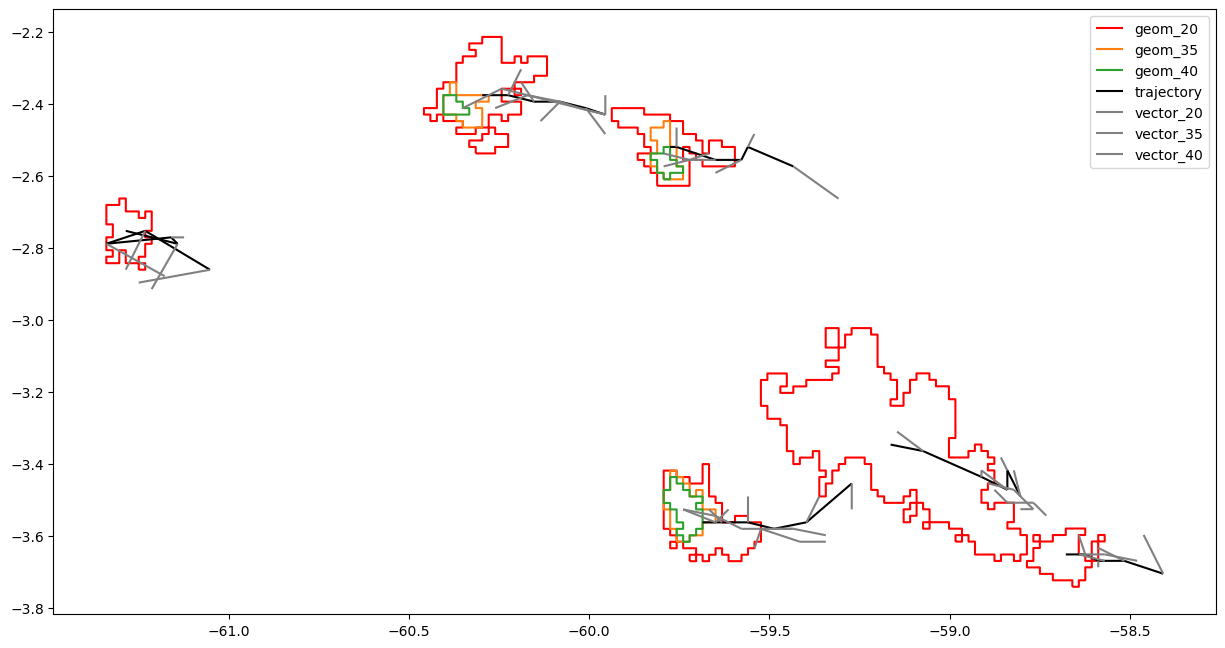

In [515]:
plot(df_filter1,5)

In [252]:
fam_test

timestamp  time  uid  id_t       lat        lon     p0  \
Fam_118 601  2014-09-07 19:48:00    99  118    23 -3.328352 -60.639290  110.0   
        743  2014-09-07 22:00:00   110  118    13 -3.957147 -60.657730   75.0   
        790  2014-09-07 23:36:00   118  118     5 -4.460242 -60.586048   47.0   
        785  2014-09-07 23:24:00   117  118     5 -4.298570 -60.549900   56.0   
        781  2014-09-07 23:12:00   116  118     6 -4.244661 -60.567879   59.0   
        776  2014-09-07 23:00:00   115  118     6 -4.208729 -60.567852   61.0   
        771  2014-09-07 22:48:00   114  118    10 -4.208718 -60.585865   61.0   
        764  2014-09-07 22:36:00   113  118     9 -4.172774 -60.603855   63.0   
        757  2014-09-07 22:24:00   112  118    11 -4.100887 -60.639828   67.0   
        750  2014-09-07 22:12:00   111  118     9 -4.029011 -60.657784   71.0   
        734  2014-09-07 21:48:00   109  118    18 -3.903250 -60.657688   78.0   
        614  2014-09-07 20:00:00   100  118    25 -3.436112 -60.693356  104.0   
        723  2014-09-07 21:36:00   108  118    11 -3.885258 -60.693691   79.0   
        714  2014-09-07 21:24:00   107  118     8 -3.813382 -60.711639   83.0   
        702  2014-09-07 21:12:00   106  118     9 -3.777450 -60.711613   85.0   
        690  2014-09-07 21:00:00   105  118    11 -3.723565 -60.693565   88.0   
        678  2014-09-07 20:48:00   104  118    13 -3.669668 -60.693523   91.0   
        664  2014-09-07 20:36:00   103  118    15 -3.597817 -60.675468   95.0   
        650  2014-09-07 20:24:00   102  118    18 -3.561873 -60.693447   97.0   
        631  2014-09-07 20:12:00   101  118    19 -3.490009 -60.693394  101.0   
        794  2014-09-07 23:48:00   119  118    10 -4.514151 -60.568066   44.0   

               p1  size_20  mean_ref_20  ...  \
Fam_118 601  84.0    115.0    42.540183  ...   
        743  83.0     64.0    22.195404  ...   
        790  87.0     80.0    22.144835  ...   
        785  89.0    233.0    23.955956  ...   
        781  88.0    377.0    28.503227  ...   
        776  88.0    491.0    30.726535  ...   
        771  87.0    500.0    32.672668  ...   
        764  86.0    439.0    31.635835  ...   
        757  84.0    352.0    28.702319  ...   
        750  83.0    209.0    26.329849  ...   
        734  83.0     62.0    25.963840  ...   
        614  81.0    193.0    38.964272  ...   
        723  81.0    157.0    29.941554  ...   
        714  80.0    251.0    34.749968  ...   
        702  80.0    266.0    39.002614  ...   
        690  81.0    221.0    43.358884  ...   
        678  81.0    211.0    44.793348  ...   
        664  82.0    226.0    44.012299  ...   
        650  81.0    182.0    44.059591  ...   
        631  81.0    187.0    44.408560  ...   
        794  88.0     46.0    21.794038  ...   

                                                geom_intersect  \
Fam_118 601  MULTIPOLYGON (((-60.17145156860352 -3.74176549...   
        743  POLYGON ((-60.81967544555664 -3.81329584121704...   
        790  POLYGON ((-61.34163284301758 -3.66899657249450...   
        785  POLYGON ((-60.92767333984375 -3.77726745605468...   
        781  MULTIPOLYGON (((-61.21554183959961 -3.61526560...   
        776  POLYGON ((-60.90985107421875 -3.95693969726562...   
        771  POLYGON ((-60.94586563110352 -3.95690464973449...   
        764  MULTIPOLYGON (((-60.83745193481445 -3.56176137...   
        757  POLYGON ((-60.94586563110352 -3.95690464973449...   
        750  POLYGON ((-60.7835693359375 -3.705531358718872...   
        734  POLYGON ((-60.78374099731445 -3.90315437316894...   
        614  MULTIPOLYGON (((-60.24345016479492 -3.66988468...   
        723  MULTIPOLYGON (((-60.80186462402344 -4.02889966...   
        714  POLYGON ((-60.7836799621582 -3.831291437149048...   
        702  MULTIPOLYGON (((-60.53149795532227 -3.66976952...   
        690  POLYGON ((-60.58555221557617 -3.74160242080688...   
        678  MULTIPOLYGON (((-60.65763473510742 -3.83138585..

In [188]:
from shapely import wkt
import numpy as np

In [198]:
fam_test = df_filter1.query('uid == 118')
fam_test['geom_35'].fillna(value='GEOMETRYCOLLECTION EMPTY', inplace=True)


geo_frame = gpd.GeoDataFrame()
geo_frame['geometry'] = fam_test['geom_35'].apply(wkt.loads)

<AxesSubplot:>

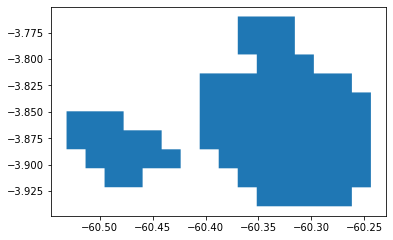

In [210]:
geo_frame.tail(2).plot()

In [162]:
fam_test['geom_35'].apply(wkt.loads)

TypeError: Only str is accepted.

In [40]:
tt = gpd.GeoDataFrame()
tt['geometry'] = fam_test['geom_intersect'].apply(wkt.loads)

<AxesSubplot:>

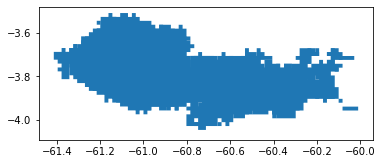

In [41]:
tt.plot()

In [13]:
import geopandas as gpd

In [ ]:
### PATH
PATH_FILE = '../tracks/S201409070000_E201409100000_VDBZc_T20_L5.pkl'

In [ ]:
### Read tracking file
df = sta.read_file(PATH_FILE)
df.head()

In [ ]:
sta.life_cicle()

In [ ]:
life_cicle(df)

In [ ]:
# Dataframe library
import pandas as pd
# Numerical Python library
import numpy as np
# netCDF4 library
import netCDF4
# Import gzip to open netCDF
import gzip
# Visualization library
import matplotlib.pyplot as plt

## Variables

**Fam_Nº**-> Refers to the number of the Tracked Family.
<br>

**timestamp** ->A digital record of the time of occurrence of a particular event.
<br>
**time** -> Refers to the tracking time in the algorithm.
<br>
**uid** -> Unique IDentifier, it is used to generate the families.
<br>
**id_t** -> Referring cluster identifier at the time of tracking occurrence. From the DBSCAN clustering algorithm.
<br>
**lat** -> Refers latitude centroid, taken from the reference matrix of the original nc files.
<br>
**lon** -> Refers longitude centroid, taken from the reference matrix of the original nc files.
<br>
**p0** -> The first coordinate point of centroid in matrix (clusters or nc_file): (p0,p1)=(x,y)=(lon,lat).
<br>
**p1** -> The second coordinate point of centroid in matrix (clusters or nc_file): (p0,p1)=(x,y)=(lon,lat).
<br>
**size_%THRESHOLD** -> Total number of Pixels in the main cluster. Each point depends on the sensor's spatial resolution (pixel size): RADAR 2x2km.
<br>
**mean_ref_%THRESHOLD** -> Averaged reflectivity of the cluster. Value in dBZ.
<br>
**max_ref_%THRESHOLD** -> Max reflectivity of the cluster. Value in dBZ.
<br>
**angle_%THRESHOLD_orig** -> Original displacement angle of the cluster at the current time.
<br>
**angle_%THRESHOLD_cor** -> Corrected displacement angle of the cluster at the current time. 
<br>
**vel_%THRESHOLD_orig** -> Original displacement velocity of the cluster at the current time in kilometers per hour (km/h).
<br>
**vel_%THRESHOLD_cor** -> Corrected displacement velocity of the cluster at the current time in kilometers per hour (km/h).
<br>
**mean_total_ref_%THRESHOLD** -> Average reflectivity of the inner clusters by threshold (Value in dBZ).
<br>
**total_size_%THRESHOLD** -> Total size of inner clusters by threshold (number of pixels).
<br>
**n_cluster_%THRESHOLD** -> Total number of inner clusters by Threshold.
<br>
**avg_angle_%THRESHOLD** -> Averaged angle for the inner cluster by threshold (Value in degree).
<br>
**avg_vel_%THRESHOLD** -> Averaged velocity for inner clusters by threshold (Value in km/h).
<br>
**status** -> Status of occurrence, type: NEW-> New cluster; CONT-> Continous cluster; SPLT -> Splitted cluster; MERG -> Merged Cluster.
<br>
**delta_t** -> Time interval for cluster life cycle.
<br>
**nc_file** -> Path of netCDF file.
<br>
**cluster_file** -> Path of cluster file (From DBSCAN).
<br>
**dsize_%THRESHOLD** -> Difference between the sizes of two consecutive clusters (in Pixel).
<br>
**dmean_ref_%THRESHOLD** -> Difference between the mean reflectivities of two consecutive clusters for main threshold (in dBZ).
<br>
**dmean_total_ref_%THRESHOLD** -> Difference between the mean reflectivities of all clusters between two consecutive times for an inner threshold (in dBZ).
<br>
**dtotal_size_%THRESHOLD** -> Difference between the total size (in pixel) of all clusters between two consecutive times for an inner threshold (values in pixel).

## Read tracking file

Tracking DataFrame.

In [ ]:
fam_tracking = pd.read_pickle("./S201409070000_E201409100000_VDBZc_T20_L5.pkl")
fam_tracking

### Example how to select a FAM by uid

In [ ]:
uid = 97
selected_fam = fam_tracking.query('uid == @uid')
selected_fam

## Example how to select a cluster in the family

In [ ]:
line = 0 #first line 

selected_line = selected_fam.iloc[[line]]
selected_line

## Example how to open the cluster file and the original data to extract reflectivity values

In [ ]:
## OPEN CLUSTERS
def open_cluster(path):
    try:
        cluster = np.load(path['cluster_file'].values[0])['arr_0']
        cluster[cluster == 0] = np.NAN
        return cluster
    except:
        print('File not found!')

In [ ]:
selected_line

In [ ]:
cluster_matrix_all = open_cluster(selected_line)
print('Original dimensions of cluster->',cluster_matrix_all.shape)

THRESHOLD_LEVEL = 0 #to select the main threshold (ex: 0-20dBZ,1-35dBZ,2-40dBZ)
cluster_matrix = cluster_matrix_all[:,:,THRESHOLD_LEVEL]
print('Selected dimensions of cluster->',cluster_matrix.shape)

In [ ]:
### OPEN NETCDF
def open_file(file_path):
    VAR_NAME = 'DBZc'
    LEVEL = 5 #2.5km height
    THRESHOLDS = [20,35,40] #dBZ
    with gzip.open(file_path['nc_file'].values[0]) as gz:
        with netCDF4.Dataset('dummy', mode='r', memory=gz.read()) as nc:
            data = nc.variables[VAR_NAME][0][LEVEL][:].filled()
            data[data == -9999.] = np.NAN
    data[data < THRESHOLDS[0]] = np.nan
    return data

In [ ]:
nc_matrix = open_file(selected_line)
print('NetCDF Max/Min values (thresholded):\n',np.nanmax(nc_matrix),np.nanmin(nc_matrix))

In [ ]:
fig, (ax,ax1) = plt.subplots(1,2, figsize=(15,6))

ax.imshow(nc_matrix)
ax1.imshow(cluster_matrix);
ax.set_title('Original file')
ax1.set_title('Cluster file');

## Extracting reflectivities from the selected cluster

To extract the reflectivity values of an individual cluster, you will need to choose the tracking 'id_t', this should be done as follows:

Visualization of individual line.

In [ ]:
selected_line

In [ ]:
### This line shows that id_t is equal to 20. 
selected_id_t = selected_line.id_t.values[0]

### Get XY coordinates from cluster matrix
x,y = np.where(cluster_matrix == selected_id_t)

### Get reflectivities values from nc_file cluster
dbz_list = nc_matrix[x,y]

In [ ]:
print('List with reflectivity values of an individual cluster.\n',dbz_list)

### Cluster location view

In [ ]:
fig, (ax,ax1) = plt.subplots(1,2, figsize=(15,6))
ax.imshow(nc_matrix)
ax1.imshow(cluster_matrix);
ax.set_title('Original file')
ax1.set_title('Cluster file');

ax.scatter(selected_line.p0,selected_line.p1,marker='x',color='r',s=100)
ax1.scatter(selected_line.p0,selected_line.p1,marker='x',color='r',s=100)